In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("Libraries imported successfully")


Libraries imported successfully


In [5]:
df = pd.read_csv("creditcard.csv")
df.head()
df.info()
df['Class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114962 entries, 0 to 114961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    114962 non-null  int64  
 1   V1      114962 non-null  float64
 2   V2      114962 non-null  float64
 3   V3      114962 non-null  float64
 4   V4      114962 non-null  float64
 5   V5      114962 non-null  float64
 6   V6      114962 non-null  float64
 7   V7      114962 non-null  float64
 8   V8      114962 non-null  float64
 9   V9      114962 non-null  float64
 10  V10     114962 non-null  float64
 11  V11     114962 non-null  float64
 12  V12     114961 non-null  float64
 13  V13     114961 non-null  float64
 14  V14     114961 non-null  float64
 15  V15     114961 non-null  float64
 16  V16     114961 non-null  float64
 17  V17     114961 non-null  float64
 18  V18     114961 non-null  float64
 19  V19     114961 non-null  float64
 20  V20     114961 non-null  float64
 21  V21     11

Class
0.0    114719
1.0       242
Name: count, dtype: int64

**Data Exploration**

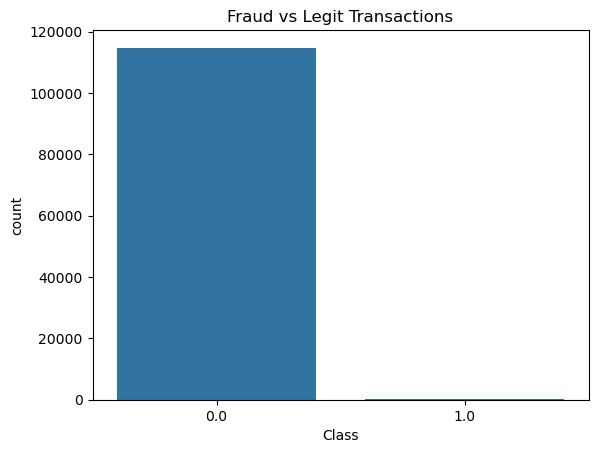

In [6]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Legit Transactions")
plt.show()


*Dataset is highly imbalanced, which is common in fraud detection problems.*

**Feature Scaling**

In [9]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


In [11]:
y.value_counts()

Class
0.0    114719
1.0       242
Name: count, dtype: int64

**Train-Test Split**

In [42]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [23]:
X.isna().sum().sort_values(ascending=False).head()


V15    1
V16    1
V28    1
V27    1
V26    1
dtype: int64

**FILLING NaN VALUES**

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


**SCALE DATA**

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scler.fit_transform(X_train)X_test = scaler.transfo(X_test)

In [39]:
y.isna().sum()


np.int64(1)

In [52]:
df = df.dropna(subset=['Class'])
X = df.drop('Class', axis=1)
y = df['Class']
y.isna().sum()


np.int64(0)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

**Model 1: Logistic Regression**

In [54]:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34416
         1.0       0.78      0.58      0.66        73

    accuracy                           1.00     34489
   macro avg       0.89      0.79      0.83     34489
weighted avg       1.00      1.00      1.00     34489



**Model 2: Decision Tree**

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34416
         1.0       0.84      0.78      0.81        73

    accuracy                           1.00     34489
   macro avg       0.92      0.89      0.90     34489
weighted avg       1.00      1.00      1.00     34489



**Confusion Matrix**

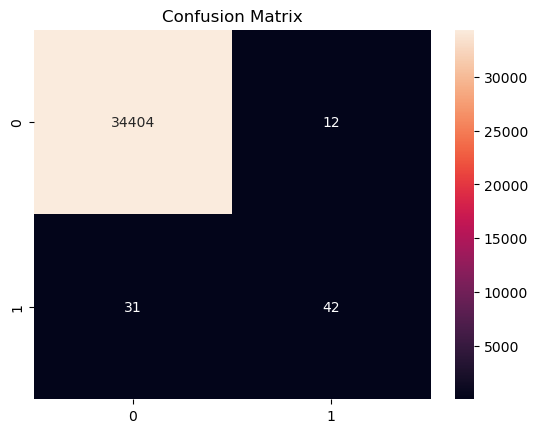

In [56]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
